In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import os

# Получить список всех файлов в папке
files = os.listdir('texts')
print(files)

# Только файлы (без подпапок)
files = [f for f in os.listdir('texts') if os.path.isfile(os.path.join('texts', f))]
print(files)

['1996_Lukyanenko_Za lesom gde podly vrag.txt', '1991_Lukyanenko_Sposobnost spustit kurok.txt', '1963_Strugatskie_Dalekaya raduga.txt', '2004_Yemets_Mefodiy Buslaev Mag polunochi.txt', '1899_Bryusov_Gora Zvezdy.txt', '1991_Alferova_Kormilez.txt', '1980_Vojskunskij_Lukodyanov Nezakonnaya planeta.txt', '1964_Veltistov_Elektronik.txt', '1993_Ivanov_Korabli i Galaktika.txt', '1986_Gulyakovskij_Dolgij voskhod na Enne.txt', '2007_Yemets_Mefodiy Buslaev Pervy eydos.txt', '1972_Krapivin_Letchik dlya osobykh porucheni.txt', '2002_Moshkov_Pobeda uskolzaet.txt', '2011_Yemets_Mefodiy Buslaev Ognennye vrata.txt', '1989_Glazkov_Vtoroj spisok.txt', '1980_Bulychev_Beloye platye Zolushki.txt', '1924_Goncharov_Mezhplanetnyj puteshestvennik.txt', '1968_Strugatskie_Skazka o troyke.txt', '1962_Strugatskie_Mobi Dik.txt', '1965_Nosov_Neznayka na Lune.txt', '1938_Lagin_Starik Khottabich.txt', '1996_Rybakov_Derni za verevochku.txt', '2009_Gorkavyy_Teoriya katastrofy.txt', '1976_Shefner_Fialka molchalivaya.txt'

In [6]:
import os
from collections import defaultdict

def create_adjacency_matrix(folder_path):
    """Создает словарь файлов и матрицу смежности"""
    files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]

    # Словарь с нумерацией файлов
    files_dict = {i: f for i, f in enumerate(files)}

    # Словарь для хранения информации о файлах
    file_data = {}
    for idx, filename in files_dict.items():
        parts = filename.replace('.txt', '').split('_', 2)
        if len(parts) == 3:
            year, author, title = parts
            file_data[idx] = {'year': year, 'author': author}

    n = len(files)
    adjacency_matrix = [[0] * n for _ in range(n)]

    # Заполняем матрицу
    for i in range(n):
        adjacency_matrix[i][i] = 1  # Связь с самим собой
        for j in range(i+1, n):
            if i in file_data and j in file_data:
                data_i = file_data[i]
                data_j = file_data[j]

                # Проверяем условие: одинаковый год ИЛИ одинаковый автор
                if data_i['year'] == data_j['year'] or data_i['author'] == data_j['author']:
                    adjacency_matrix[i][j] = 1
                    adjacency_matrix[j][i] = 1

    return files_dict, adjacency_matrix

# Использование
files_dict, matrix = create_adjacency_matrix('texts')

# Вывод словаря
print("Словарь файлов:")
for idx, name in files_dict.items():
    print(f"{idx}: {name}")

# Вывод матрицы (первые 5x5 для примера)
print("\nМатрица смежности (первые 5 строк):")
for i in range(min(5, len(matrix))):
    print(matrix[i])

Словарь файлов:
0: 1996_Lukyanenko_Za lesom gde podly vrag.txt
1: 1991_Lukyanenko_Sposobnost spustit kurok.txt
2: 1963_Strugatskie_Dalekaya raduga.txt
3: 2004_Yemets_Mefodiy Buslaev Mag polunochi.txt
4: 1899_Bryusov_Gora Zvezdy.txt
5: 1991_Alferova_Kormilez.txt
6: 1980_Vojskunskij_Lukodyanov Nezakonnaya planeta.txt
7: 1964_Veltistov_Elektronik.txt
8: 1993_Ivanov_Korabli i Galaktika.txt
9: 1986_Gulyakovskij_Dolgij voskhod na Enne.txt
10: 2007_Yemets_Mefodiy Buslaev Pervy eydos.txt
11: 1972_Krapivin_Letchik dlya osobykh porucheni.txt
12: 2002_Moshkov_Pobeda uskolzaet.txt
13: 2011_Yemets_Mefodiy Buslaev Ognennye vrata.txt
14: 1989_Glazkov_Vtoroj spisok.txt
15: 1980_Bulychev_Beloye platye Zolushki.txt
16: 1924_Goncharov_Mezhplanetnyj puteshestvennik.txt
17: 1968_Strugatskie_Skazka o troyke.txt
18: 1962_Strugatskie_Mobi Dik.txt
19: 1965_Nosov_Neznayka na Lune.txt
20: 1938_Lagin_Starik Khottabich.txt
21: 1996_Rybakov_Derni za verevochku.txt
22: 2009_Gorkavyy_Teoriya katastrofy.txt
23: 1976_S

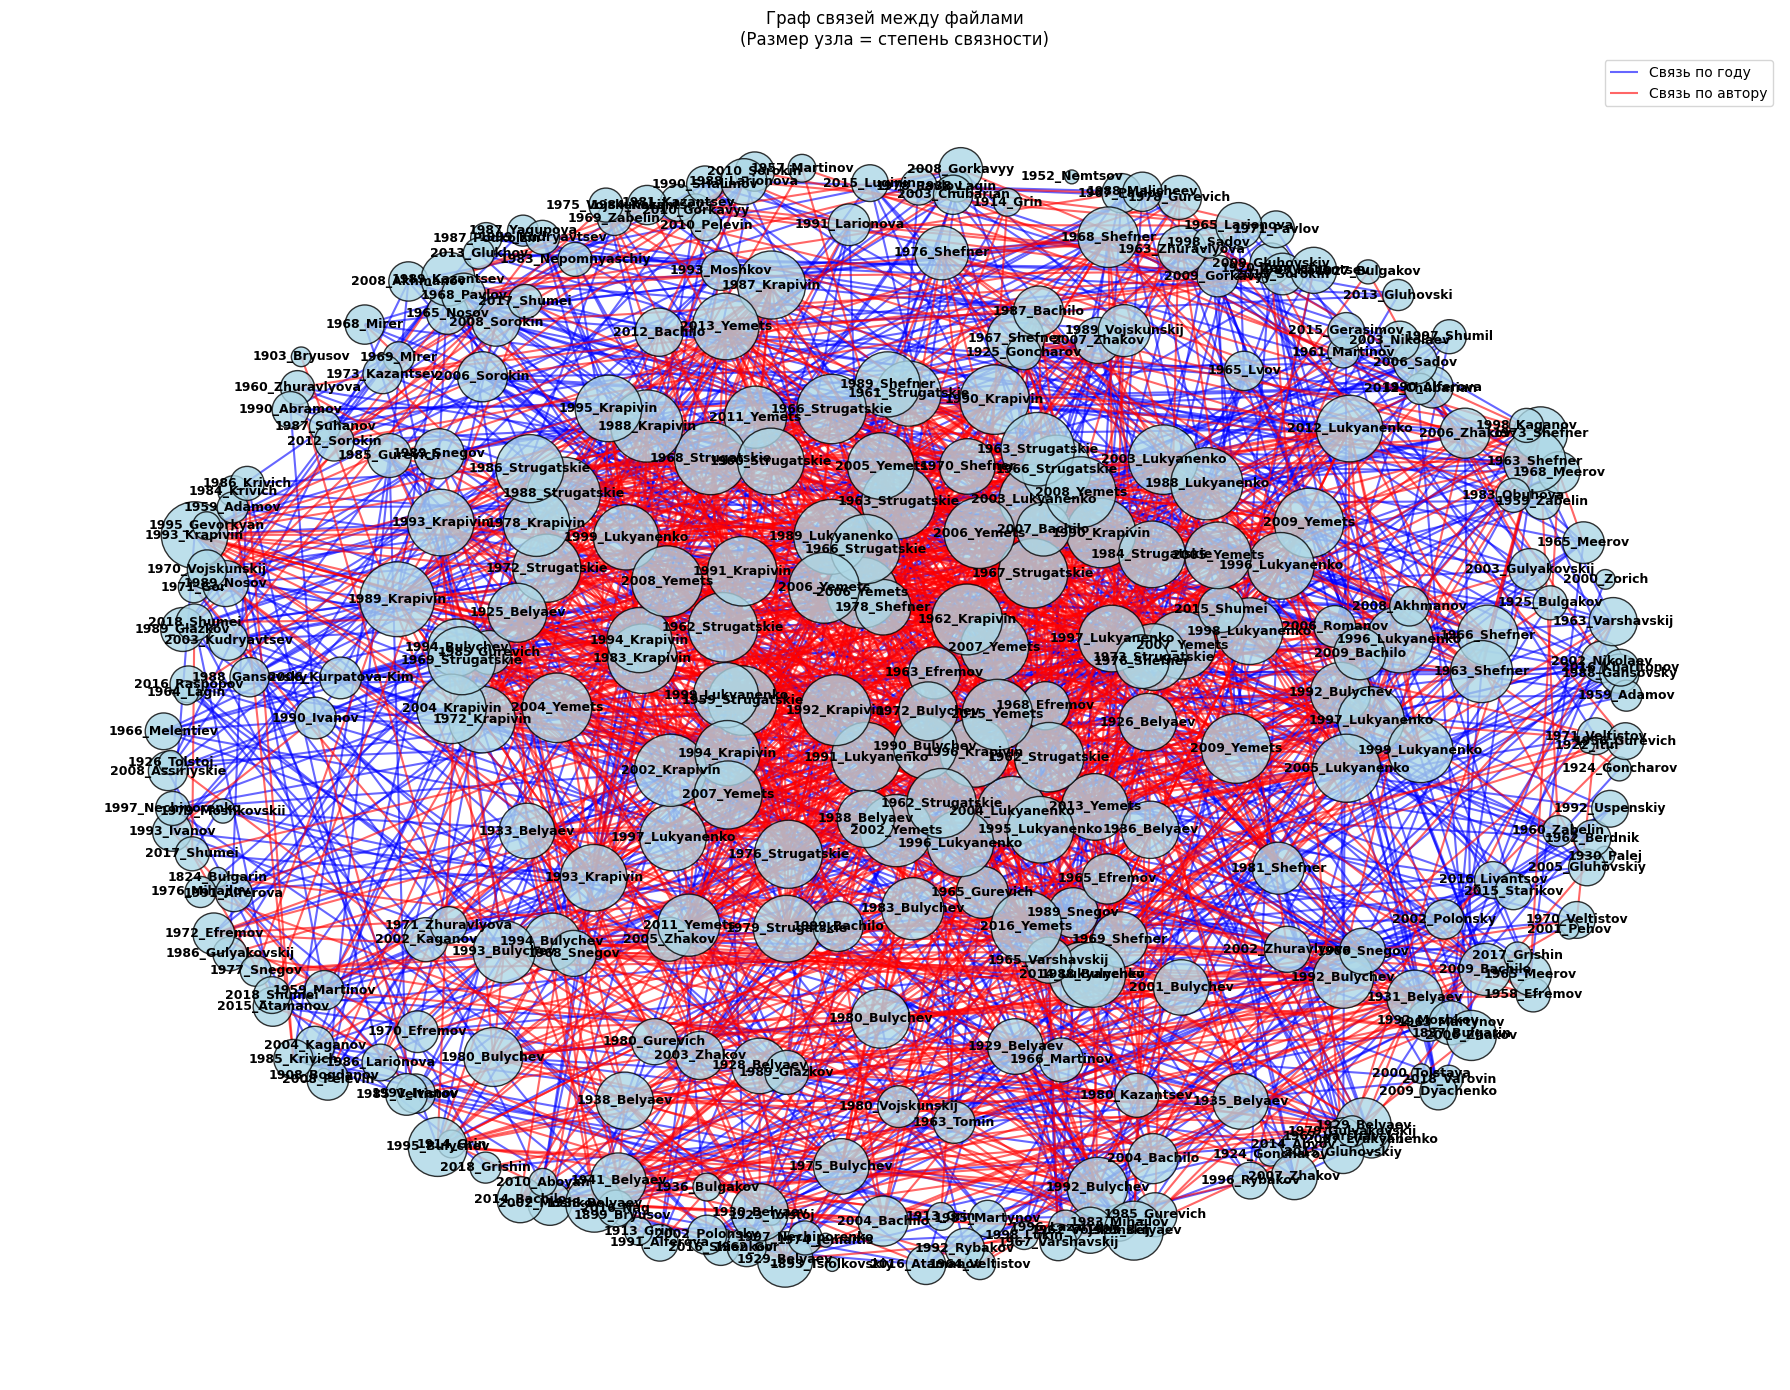

АНАЛИЗ СВЯЗЕЙ:
Всего файлов: 335
Всего связей: 1995
  - Связей по году: 738
  - Связей по автору: 1257

Самые связанные файлы (топ-5):
  172: 1989_Lukyanenko_Vybor.txt
     Автор: Lukyanenko, Год: 1989, Связей: 28
  174: 1989_Krapivin_Gusi-gusi, ga-ga-ga....txt
     Автор: Krapivin, Год: 1989, Связей: 28
  2: 1963_Strugatskie_Dalekaya raduga.txt
     Автор: Strugatskie, Год: 1963, Связей: 27
  48: 1988_Strugatskie_Grad Obrechenniy.txt
     Автор: Strugatskie, Год: 1988, Связей: 27
  224: 1963_Strugatskie_trudno bit bogom.txt
     Автор: Strugatskie, Год: 1963, Связей: 27

ПОДРОБНАЯ ИНФОРМАЦИЯ ПО СВЯЗЯМ:

1996_Lukyanenko_Za lesom gde podly vrag.txt:
  Связи по году (5):
    - 1996_Rybakov_Derni za verevochku.txt
    - 1996_Lukyanenko_Pristan zheltyh korabley.txt
    - 1996_Krapivin_Vzryv Generalnogo shtaba.txt
    - 1996_Lukyanenko_Atomniy son.txt
    - 1996_Lazarchuk_Opozdavshie k letu.txt
  Связи по автору (17):
    - 1991_Lukyanenko_Sposobnost spustit kurok.txt
    - 2004_Lukyanenko_

In [14]:
import networkx as nx

G = nx.Graph()

# Добавляем узлы с короткими метками
for i, name in files_dict.items():
    parts = name.replace('.txt', '').split('_', 2)
    year, author, title = parts[0], parts[1], parts[2] if len(parts) > 2 else ''

    short_label = f"{year}_{author}"
    G.add_node(i, label=name, short_label=short_label, year=year, author=author, full_title=title)

# Добавляем ребра с указанием типа связи
for i in range(len(files)):
    for j in range(i+1, len(files)):
        same_year = G.nodes[i]['year'] == G.nodes[j]['year']
        same_author = G.nodes[i]['author'] == G.nodes[j]['author']

        if same_year or same_author:
            # Определяем тип связи для цвета ребра
            edge_type = 'year' if same_year else 'author'
            G.add_edge(i, j, type=edge_type)

# Рисуем граф с подписями
plt.figure(figsize=(18, 14))
pos = nx.spring_layout(G, k=2, iterations=100)

# Используем короткие подписи для узлов
labels = {i: G.nodes[i]['short_label'] for i in G.nodes()}

# Размер узлов в зависимости от степени связности
node_sizes = [100 + 100 * G.degree(i) for i in G.nodes()]

# Разделяем ребра по типу для разного цвета
edges_by_year = [(u, v) for u, v, d in G.edges(data=True) if d['type'] == 'year']
edges_by_author = [(u, v) for u, v, d in G.edges(data=True) if d['type'] == 'author']

# Рисуем узлы
nx.draw_networkx_nodes(G, pos,
                      node_color='lightblue',
                      node_size=node_sizes,
                      alpha=0.8,
                      edgecolors='black',
                      linewidths=1)

# Рисуем ребра разными цветами
nx.draw_networkx_edges(G, pos,
                      edgelist=edges_by_year,
                      edge_color='blue',
                      alpha=0.6,
                      width=1.5,
                      label='Связь по году')

nx.draw_networkx_edges(G, pos,
                      edgelist=edges_by_author,
                      edge_color='red',
                      alpha=0.6,
                      width=1.5,
                      label='Связь по автору')

# Рисуем подписи
nx.draw_networkx_labels(G, pos,
                       labels=labels,
                       font_size=9,
                       font_weight='bold')

plt.title("Граф связей между файлами\n(Размер узла = степень связности)")
plt.legend(loc='best')
plt.axis('off')
plt.tight_layout()
plt.show()

# Анализ связей
print("АНАЛИЗ СВЯЗЕЙ:")
print("=" * 80)

# Считаем статистику по типам связей
year_edges = len(edges_by_year)
author_edges = len(edges_by_author)

print(f"Всего файлов: {len(files_dict)}")
print(f"Всего связей: {G.number_of_edges()}")
print(f"  - Связей по году: {year_edges}")
print(f"  - Связей по автору: {author_edges}")

print("\nСамые связанные файлы (топ-5):")
degrees = sorted(G.degree(), key=lambda x: x[1], reverse=True)[:5]
for node, degree in degrees:
    file_name = files_dict[node]
    year = G.nodes[node]['year']
    author = G.nodes[node]['author']
    print(f"  {node}: {file_name}")
    print(f"     Автор: {author}, Год: {year}, Связей: {degree}")

# Анализ связей для каждого файла
print("\n" + "=" * 80)
print("ПОДРОБНАЯ ИНФОРМАЦИЯ ПО СВЯЗЯМ:")
print("=" * 80)

for i, name in files_dict.items():
    connections = list(G.neighbors(i))
    if connections:
        print(f"\n{name}:")

        # Группируем связи по типу
        year_connections = []
        author_connections = []

        for conn in connections:
            edge_data = G.get_edge_data(i, conn)
            if edge_data['type'] == 'year':
                year_connections.append(conn)
            else:
                author_connections.append(conn)

        if year_connections:
            print(f"  Связи по году ({len(year_connections)}):")
            for conn in year_connections:
                print(f"    - {files_dict[conn]}")

        if author_connections:
            print(f"  Связи по автору ({len(author_connections)}):")
            for conn in author_connections:
                print(f"    - {files_dict[conn]}")
    else:
        print(f"\n{name}: Нет связей с другими файлами")

# Статистика по годам и авторам
print("\n" + "=" * 80)
print("СТАТИСТИКА ПО ГОДАМ И АВТОРАМ:")
print("=" * 80)

# Группировка по годам
years_dict = defaultdict(list)
for i in G.nodes():
    year = G.nodes[i]['year']
    years_dict[year].append(i)

print("\nГруппы по годам (связанные файлы):")
for year, nodes in sorted(years_dict.items()):
    if len(nodes) > 1:  # Только если есть связь
        print(f"  Год {year}: {len(nodes)} файлов")
        for node in nodes:
            print(f"    - {files_dict[node]}")

# Группировка по авторам
authors_dict = defaultdict(list)
for i in G.nodes():
    author = G.nodes[i]['author']
    authors_dict[author].append(i)

print("\nГруппы по авторам (связанные файлы):")
for author, nodes in sorted(authors_dict.items()):
    if len(nodes) > 1:  # Только если есть связь
        print(f"  Автор {author}: {len(nodes)} файлов")
        for node in nodes:
            print(f"    - {files_dict[node]}")

In [22]:
import os
import networkx as nx

# Ваш существующий код для создания графа
files = [f for f in os.listdir('texts') if f.endswith('.txt')]
files_dict = {i: f for i, f in enumerate(files)}

G = nx.Graph()

# Добавляем узлы с атрибутами
for i, name in files_dict.items():
    parts = name.replace('.txt', '').split('_', 2)
    year, author = parts[0], parts[1] if len(parts) > 1 else ''

    # Добавляем все атрибуты, которые нужны в Gephi
    G.add_node(i,
               label=name,
               title=name.replace('.txt', ''),
               year=year,
               author=author,
               size=1.0 + 0.5 * len(author))  # Размер можно задать здесь

# Добавляем ребра с атрибутами
for i in range(len(files)):
    for j in range(i+1, len(files)):
        same_year = G.nodes[i]['year'] == G.nodes[j]['year']
        same_author = G.nodes[i]['author'] == G.nodes[j]['author']

        if same_year and same_author:
            G.add_edge(i, j, type='both', weight=2.0, label='год+автор')
        elif same_year:
            G.add_edge(i, j, type='year', weight=1.5, label='год')
        elif same_author:
            G.add_edge(i, j, type='author', weight=1.0, label='автор')

# ЭКСПОРТ В GEXF (формат Gephi)
nx.write_gexf(G, "graph_for_gephi.gexf")
print("Граф экспортирован в 'graph_for_gephi.gexf'")
print("Откройте этот файл в Gephi")

Граф экспортирован в 'graph_for_gephi.gexf'
Откройте этот файл в Gephi
